## Importing the relevant libraries

In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('car_dataset(USA).csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
data_no_mv['Price'].sum()

np.float64(78698039.96000001)

In [9]:
data_no_mv['Price'].mean()

np.float64(19552.308064596276)

### Exploring the PDFs

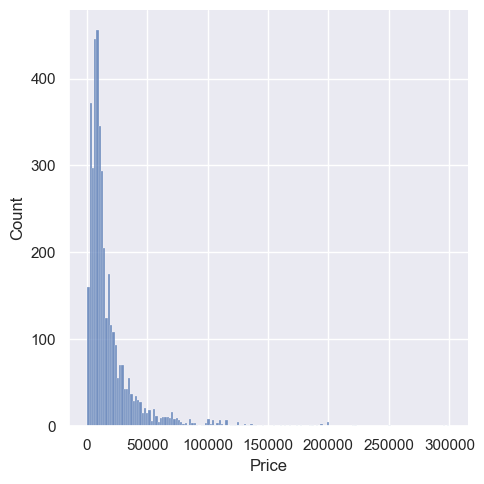

In [10]:
sns.displot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


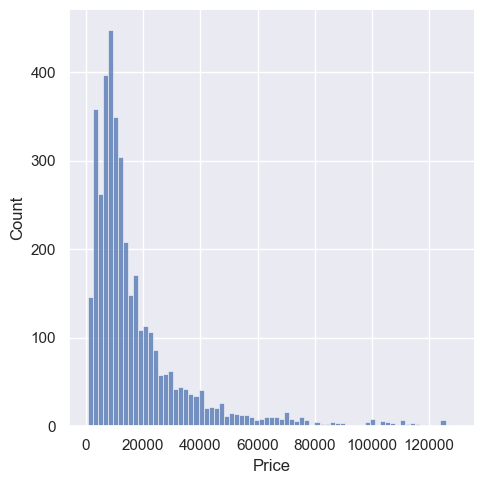

In [12]:
sns.displot(data_1['Price'])

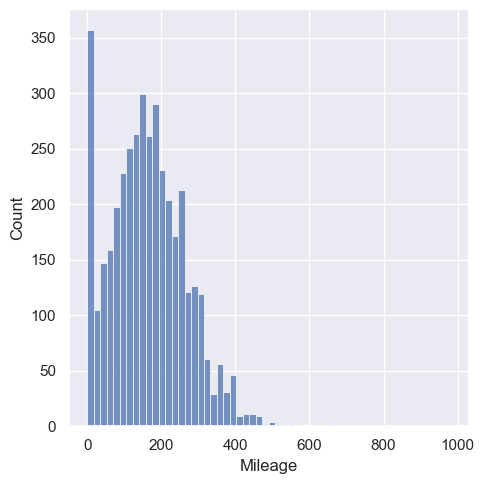

In [13]:

sns.displot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

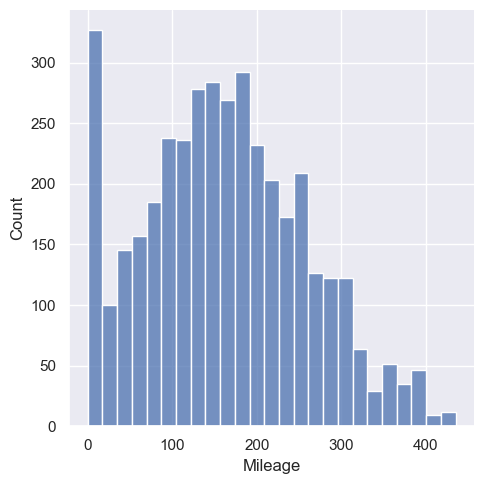

In [15]:
sns.displot(data_2['Mileage'])

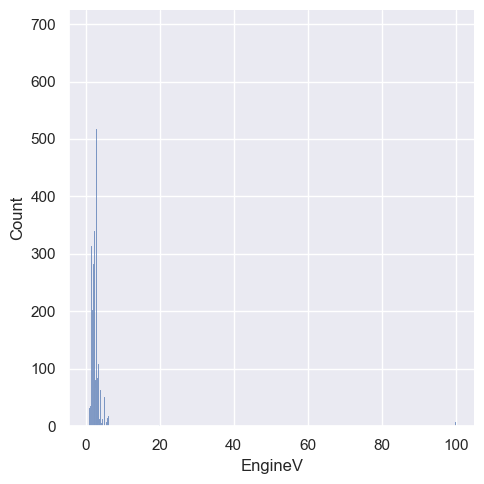

In [16]:
sns.displot(data_no_mv['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

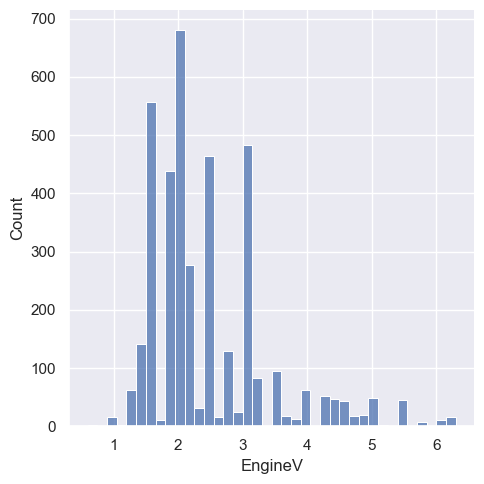

In [18]:
sns.displot(data_3['EngineV'])

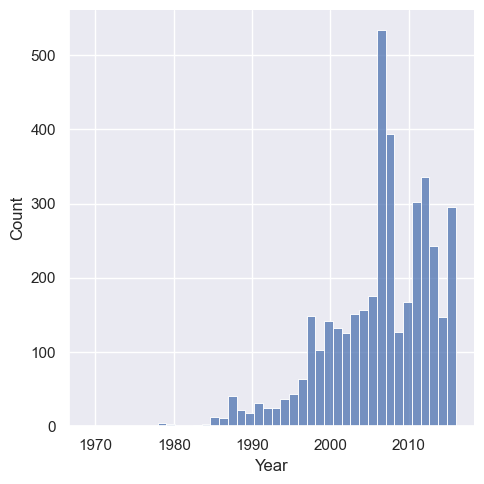

In [19]:
sns.displot(data_no_mv['Year'])

In [20]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

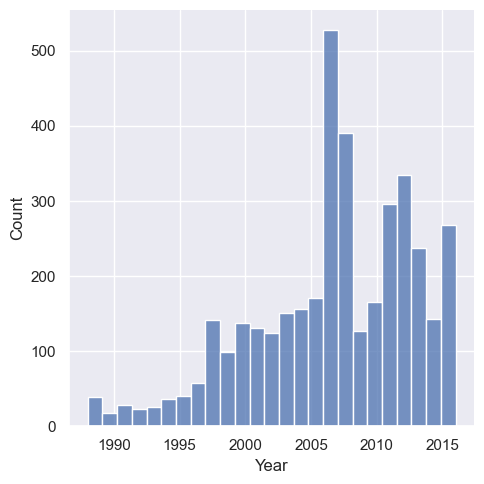

In [21]:
sns.displot(data_4['Year'])

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:

data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

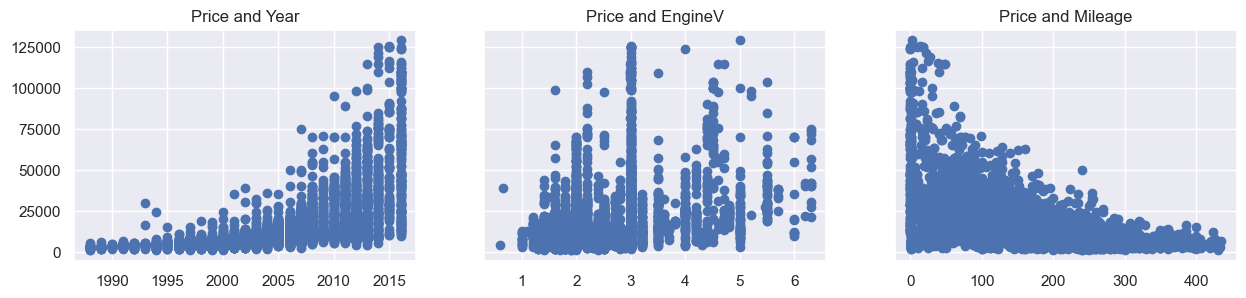

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

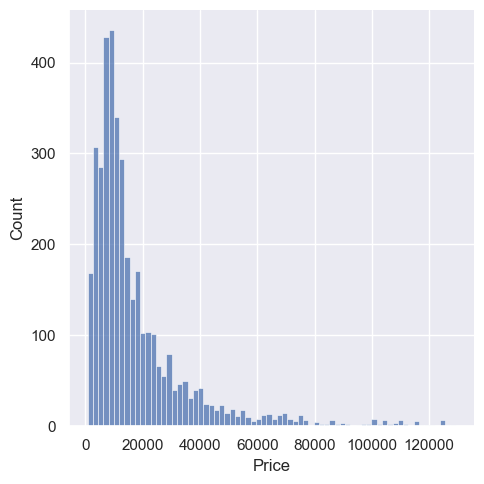

In [25]:
sns.displot(data_cleaned['Price'])

### Relaxing the assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


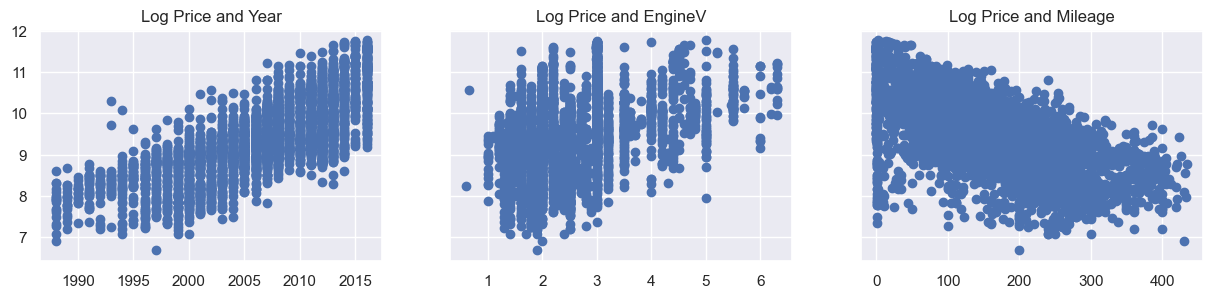

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()


In [28]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [31]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [32]:
data_no_multicollinearity = data_cleaned.copy()

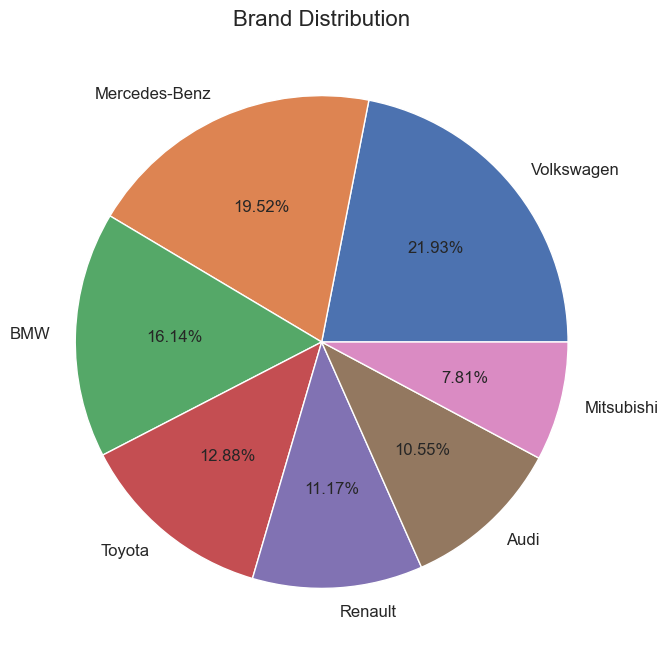

<Figure size 640x480 with 0 Axes>

In [33]:


# Data
labels = ['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'Renault', 'Audi', 'Mitsubishi']
sizes = [21.93, 19.52, 16.14, 12.88, 11.17, 10.55, 7.81]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 12})  # Set font size here
plt.title("Brand Distribution", fontsize=16)  # Font size for title
plt.show()

plt.savefig('pie.png')

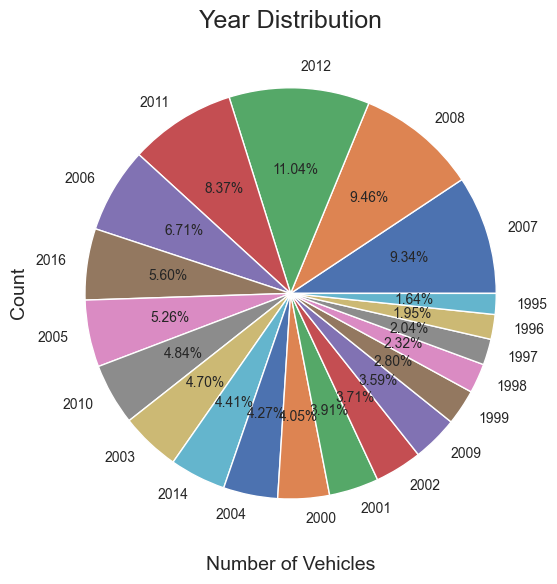

In [34]:
# Year Distribution Data
data_year = [
    8.53, 8.64, 10.09, 7.65, 6.13, 5.12, 4.81, 4.42, 4.29, 4.03, 
    3.90, 3.70, 3.57, 3.39, 3.28, 2.56, 2.12, 1.86, 1.78, 1.50
]
labels_year = [
    '2007', '2008', '2012', '2011', '2006', '2016', '2005', '2010',
    '2003', '2014', '2004', '2000', '2001', '2002', '2009', '1999',
    '1998', '1997', '1996', '1995'
]

# Plotting the pie chart for Year Distribution
plt.figure(figsize=(6, 6))  # Adjust figure size for larger number of labels
plt.pie(data_year, labels=labels_year, autopct='%1.2f%%', textprops={'fontsize': 10})  # Smaller font for many labels
plt.title("Year Distribution", fontsize=18)  # Increase title font size
plt.ylabel("Count", fontsize=14)  # Adjust y-axis font size
plt.xlabel("Number of Vehicles", fontsize=14)  # Adjust x-axis font size
plt.tight_layout()
plt.show()


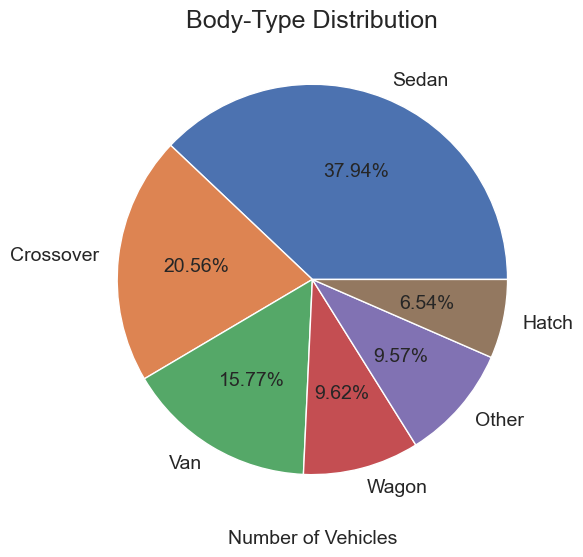

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

# Example data for a pie chart
data = [37.94, 20.56, 15.77, 9.62, 9.57, 6.54]
labels = ['Sedan', 'Crossover', 'Van', 'Wagon', 'Other', 'Hatch']

# Plotting the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size
plt.pie(data, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 14})  # Increase label font size
plt.title("Body-Type Distribution", fontsize=18)  # Increase title font size
 # Adjust y-axis font size
plt.xlabel("Number of Vehicles", fontsize=14)  # Adjust x-axis font size
plt.tight_layout()
plt.show()


plt.savefig('body.png')

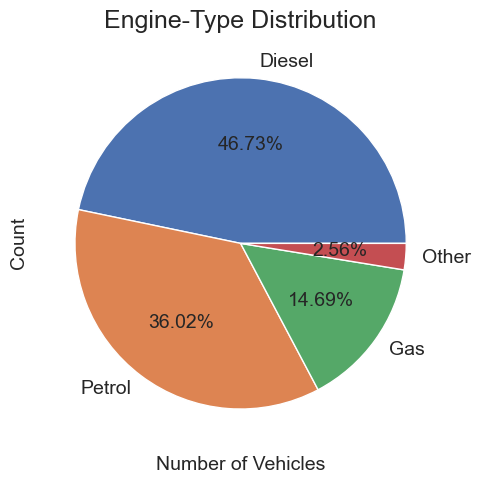

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

# Engine-Type Data
data_engine = [46.73, 36.02, 14.69, 2.56]
labels_engine = ['Diesel', 'Petrol', 'Gas', 'Other']

# Plotting the pie chart for Engine-Type Distribution
plt.figure(figsize=(5, 5))  # Adjust figure size
plt.pie(data_engine, labels=labels_engine, autopct='%1.2f%%', textprops={'fontsize': 14})  # Increase font size
plt.title("Engine-Type Distribution", fontsize=18)  # Increase title font size
plt.ylabel("Count", fontsize=14)  # Adjust y-axis font size
plt.xlabel("Number of Vehicles", fontsize=14)  # Adjust x-axis font size
plt.tight_layout()
plt.show()


plt.savefig('engine.png')

## Create dummy variables

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [38]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange a bit

In [39]:

data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [40]:
cols = ['log_price', 'Mileage', 'EngineV', 'Year','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [41]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,1999,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

### Declare the inputs and the targets

In [42]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [44]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [46]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [47]:

y_hat = reg.predict(x_train)

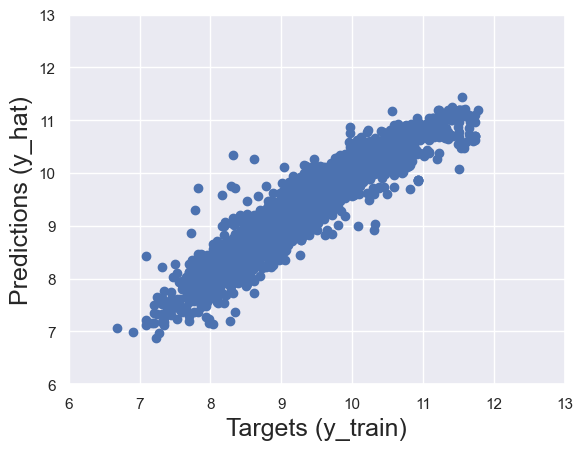

In [48]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

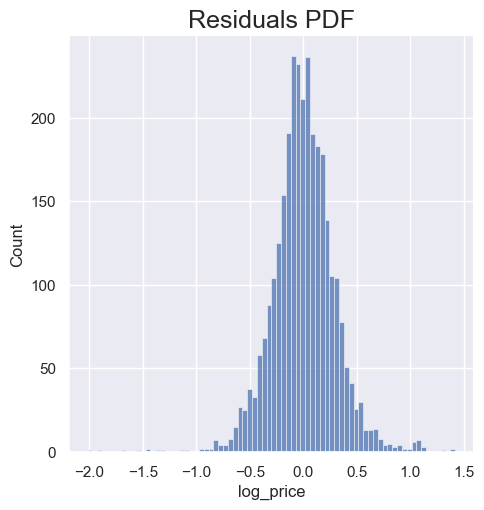

In [49]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [50]:
reg.score(x_train,y_train)

0.8849485492094937

### Finding the weights and bias

In [51]:
reg.intercept_

np.float64(9.415379879770514)

In [52]:
reg.coef_

array([-0.10834397,  0.21888063,  0.50702491,  0.02583093,  0.00271501,
       -0.13396361, -0.20432869, -0.07814928, -0.10319911, -0.09312869,
       -0.07587858, -0.14180638, -0.0980039 , -0.15795634, -0.04301379,
       -0.01846564, -0.06002956,  0.25497094])

In [53]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.108344
1,EngineV,0.218881
2,Year,0.507025
3,Brand_BMW,0.025831
4,Brand_Mercedes-Benz,0.002715
5,Brand_Mitsubishi,-0.133964
6,Brand_Renault,-0.204329
7,Brand_Toyota,-0.078149
8,Brand_Volkswagen,-0.103199
9,Body_hatch,-0.093129


In [54]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [55]:
y_hat_test = reg.predict(x_test)

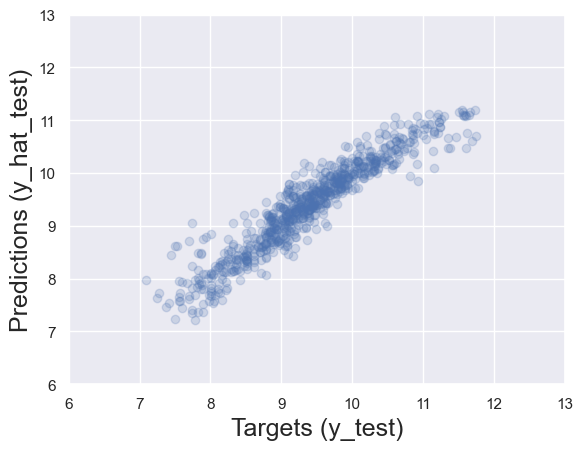

In [56]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [57]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8518.982858
1,3282.274819
2,1593.751749
3,7141.202337
4,8906.586822


In [58]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8518.982858,NaN
1,3282.274819,7900.0
2,1593.751749,NaN
3,7141.202337,NaN
4,8906.586822,NaN
...,...,...
769,28913.800999,6950.0
770,14257.841065,NaN
771,18578.036711,NaN
772,33194.156645,NaN


In [59]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8518.982858,2300.0
1,3282.274819,2800.0
2,1593.751749,2500.0
3,7141.202337,6400.0
4,8906.586822,9150.0
...,...,...
769,28913.800999,29500.0
770,14257.841065,9600.0
771,18578.036711,18300.0
772,33194.156645,68500.0


In [61]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [62]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8518.982858,2300.0,-6218.982858,270.390559
1,3282.274819,2800.0,-482.274819,17.224101
2,1593.751749,2500.0,906.248251,36.249930
3,7141.202337,6400.0,-741.202337,11.581287
4,8906.586822,9150.0,243.413178,2.660253
...,...,...,...,...
769,28913.800999,29500.0,586.199001,1.987115
770,14257.841065,9600.0,-4657.841065,48.519178
771,18578.036711,18300.0,-278.036711,1.519326
772,33194.156645,68500.0,35305.843355,51.541377


In [63]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16678.159053,18165.817106,1487.658053,23.303106
std,14067.654521,19967.858908,9745.038154,26.166910
min,1366.558774,1200.000000,-23675.039252,0.008150
25%,6502.797787,6900.000000,-1749.131999,7.738524
50%,12357.260514,11600.000000,59.230623,16.253640
75%,21973.290031,20500.000000,1649.253553,30.146462
max,73147.951567,126000.000000,81495.898963,270.390559


In [64]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
108,6500.53,6500.00,-0.53,0.01
738,24875.40,24900.00,24.60,0.10
79,15716.88,15700.00,-16.88,0.11
16,20526.82,20500.00,-26.82,0.13
323,9917.04,9900.00,-17.04,0.17
410,14830.84,14800.00,-30.84,0.21
340,15435.53,15400.00,-35.53,0.23
631,8480.22,8500.00,19.78,0.23
350,23444.30,23500.00,55.70,0.24
452,37604.64,37700.00,95.36,0.25


In [65]:
import joblib
joblib.dump(reg, 'car_price_model.pkl')

['car_price_model.pkl']

In [66]:
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load the trained model (assuming it's saved as 'car_price_model.pkl')
model = joblib.load('car_price_model.pkl')  

# Define input widgets

mileage_input = widgets.IntText(description="Kms Driven")
engine_volume_input = widgets.FloatText(description="Engine Volume")
year_input = widgets.IntText(description="Year")
bmw_input = widgets.Dropdown(options=['True','False'], description="Brand: BMW")
merc_input = widgets.Dropdown(options=['True','False'], description="Brand: Mercedes-Benz")
mits_input = widgets.Dropdown(options=['True','False'], description="Brand: Mitsubishi")
renault_input = widgets.Dropdown(options=['True','False'], description="Brand: Renault")
toyota_input = widgets.Dropdown(options=['True','False'], description="Brand: Toyota")
volks_input = widgets.Dropdown(options=['True','False'], description="Brand: Volkswagen")

body_hatch_input = widgets.Dropdown(options=['True','False'], description="Body: Hatch")
body_other_input = widgets.Dropdown(options=['True','False'], description="Body: Other")
body_sedan_input = widgets.Dropdown(options=['True','False'], description="Body: Sedan")
body_vagon_input = widgets.Dropdown(options=['True','False'], description="Body: Wagon")
body_van_input = widgets.Dropdown(options=['True','False'], description="Body: Van")

gas_input = widgets.Dropdown(options=['True','False'], description="Engine-type: Gas")
other_input = widgets.Dropdown(options=['True','False'], description="Engine-type: Other")
petrol_input = widgets.Dropdown(options=['True','False'], description="Engine-type: Petrol")

registration_input =widgets.Dropdown(options=['Yes'], description="Registration")

# Display for output
output = widgets.Output()

# Prediction function
def predict_price(b):
    with output:
        output.clear_output()
        try:
            # Gather inputs
            mileage=mileage_input.value
            engine_volume=engine_volume_input.value
            year = year_input.value
            bmw=bmw_input.value
            merc=merc_input.value
            mits=mits_input.value
            ren=renault_input.value
            toyota=toyota_input.value
            volks=volks_input.value

            hatch=body_hatch_input.value
            other=body_other_input.value
            sedan=body_sedan_input.value
            vagon=body_vagon_input.value
            van=body_van_input.value

            gas=gas_input.value
            other2=other_input.value
            petrol=petrol_input.value
            regs=registration_input.value
        

            # Map categorical variables to model-compatible encoding
            bmw_map = {'False': 1, 'True': 0}
            merc_map = {'False': 1, 'True': 0}
            mits_map = {'False': 1, 'True': 0}
            ren_map = {'False': 1, 'True': 0}
            toyota_map = {'False': 1, 'True': 0}
            volks_map = {'False': 1, 'True': 0}

            map1 = {'False': 1, 'True': 0}
            map2 = {'False': 1, 'True': 0}
            map3 = {'False': 1, 'True': 0}
            map4 = {'False': 1, 'True': 0}
            map5 = {'False': 1, 'True': 0}
            map6 = {'False': 1, 'True': 0}
            map7 = {'False': 1, 'True': 0}
            map8 = {'False': 1, 'True': 0}

            map9 = {'Yes': 1}
        
            
            
            bmw_encoded = bmw_map[bmw]
            merc_encoded = merc_map[merc]
            mits_encoded = mits_map[mits]
            ren_encoded = ren_map[ren]
            toyota_encoded = toyota_map[toyota]
            volks_encoded = volks_map[volks]
            

            map1_encoded = map1[hatch]
            map2_encoded = map2[other]
            map3_encoded = map3[sedan]
            map4_encoded = map4[vagon]
            map5_encoded = map5[van]
            map6_encoded = map6[gas]
            map7_encoded = map7[other2]
            map8_encoded = map8[petrol]
            map9_encoded = map9[regs]

            
            # Prepare data for prediction
            input_data = [[mileage,engine_volume,year,bmw_encoded,merc_encoded,mits_encoded,ren_encoded,toyota_encoded,volks_encoded,map1_encoded,map2_encoded,map3_encoded,map4_encoded,map5_encoded,map6_encoded,map7_encoded,map8_encoded,map9_encoded]]
            
            # Predict and display result
            predicted_price = model.predict(input_data)[0]
            print(f"Estimated Price: ${predicted_price:.2f}")
        except Exception as e:
            print(f"Error: {e}")

# Predict button
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_price)

# Display inputs and button in the notebook
display(mileage_input,engine_volume_input,year_input,bmw_input,merc_input,mits_input,renault_input,toyota_input,volks_input,body_hatch_input,body_other_input,body_sedan_input,body_vagon_input,body_van_input,gas_input,other_input,petrol_input,registration_input,predict_button, output)


IntText(value=0, description='Kms Driven')

FloatText(value=0.0, description='Engine Volume')

IntText(value=0, description='Year')

Dropdown(description='Brand: BMW', options=('True', 'False'), value='True')

Dropdown(description='Brand: Mercedes-Benz', options=('True', 'False'), value='True')

Dropdown(description='Brand: Mitsubishi', options=('True', 'False'), value='True')

Dropdown(description='Brand: Renault', options=('True', 'False'), value='True')

Dropdown(description='Brand: Toyota', options=('True', 'False'), value='True')

Dropdown(description='Brand: Volkswagen', options=('True', 'False'), value='True')

Dropdown(description='Body: Hatch', options=('True', 'False'), value='True')

Dropdown(description='Body: Other', options=('True', 'False'), value='True')

Dropdown(description='Body: Sedan', options=('True', 'False'), value='True')

Dropdown(description='Body: Wagon', options=('True', 'False'), value='True')

Dropdown(description='Body: Van', options=('True', 'False'), value='True')

Dropdown(description='Engine-type: Gas', options=('True', 'False'), value='True')

Dropdown(description='Engine-type: Other', options=('True', 'False'), value='True')

Dropdown(description='Engine-type: Petrol', options=('True', 'False'), value='True')

Dropdown(description='Registration', options=('Yes',), value='Yes')

Button(description='Predict', style=ButtonStyle())

Output()